In [ ]:
#Multicollinearity

In [7]:
#Load libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
df_vif = pd.read_excel('covid_restaurant_full_post_outlier.xlsx')
df_vif=df_vif.drop(columns=['State_x', 'Area_name'])
df_vif.head(10)

,rating,price,pickup,delivery,restaurant_reservation,total_restaurants_zip,Total_Reviews_Zip,Average_Rating_Zip,Average_Price_Zip,hotdogs,...,covid_high,covid_low,covid_moderate,covid_substantial,SizeRank,zillow_sfh_sale_price,redfin_sale_price,redfin_days_on_market,redfin_homes_sold,is_closed
0,2.5,1,0,0,0,13,703,3.807692,1.615385,0,...,0,0,1,0,388,335737,363211,39,4780,1
1,1.5,1,0,1,0,68,5612,3.169118,1.514706,1,...,0,0,0,1,3,461902,472842,26,124537,0
2,3.0,1,0,0,0,115,14069,3.508696,1.704348,0,...,0,0,1,0,48,393949,386701,30,27870,1
3,3.0,1,0,0,0,195,28703,3.784615,1.558974,0,...,0,0,1,0,48,393949,386701,30,27870,1
4,4.0,1,0,0,0,356,39868,3.737360,1.693820,0,...,0,0,0,1,135,389140,369527,49,8227,1
5,1.5,2,0,0,0,76,7888,3.664474,1.605263,0,...,0,0,1,0,28,190756,167109,31,21865,1
6,4.0,1,0,0,0,43,1374,3.546512,1.465116,0,...,0,0,1,0,28,190756,167109,31,21865,1
7,4.0,1,0,0,0,143,14177,3.325175,1.454545,0,...,0,0,0,1,3,461902,472842,26,124537,1
8,3.5,2,0,0,0,108,5466,3.370370,1.722222,0,...,0,0,1,0,179,203957,170770,63,4602,1
9,4.0,2,0,0,0,73,10137,3.301370,1.671233,0,...,0,0,0,1,3,461902,472842,26,124537,1


In [14]:
X = df_vif.iloc[:,:-1]

In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data.sort_values(by=['VIF'], ascending=False))

                                      feature          VIF
49                             covid_moderate  3789.133566
50                          covid_substantial  2455.615476
53                          redfin_sale_price   488.737250
52                      zillow_sfh_sale_price   470.975200
47                                 covid_high   134.067630
41            Rural_urban_continuum_code_2013   121.157190
46  Med_HH_Income_Percent_of_State_Total_2019   111.111336
45               Median_Household_Income_2019    80.228556
42                  Urban_influence_code_2013    72.352247
48                                  covid_low    53.732749
55                          redfin_homes_sold    29.399595
44                     Unemployment_rate_2020    19.585051
54                      redfin_days_on_market    13.619494
51                                   SizeRank     5.723813
6                           Total_Reviews_Zip     4.943125
5                       total_restaurants_zip     4.7616

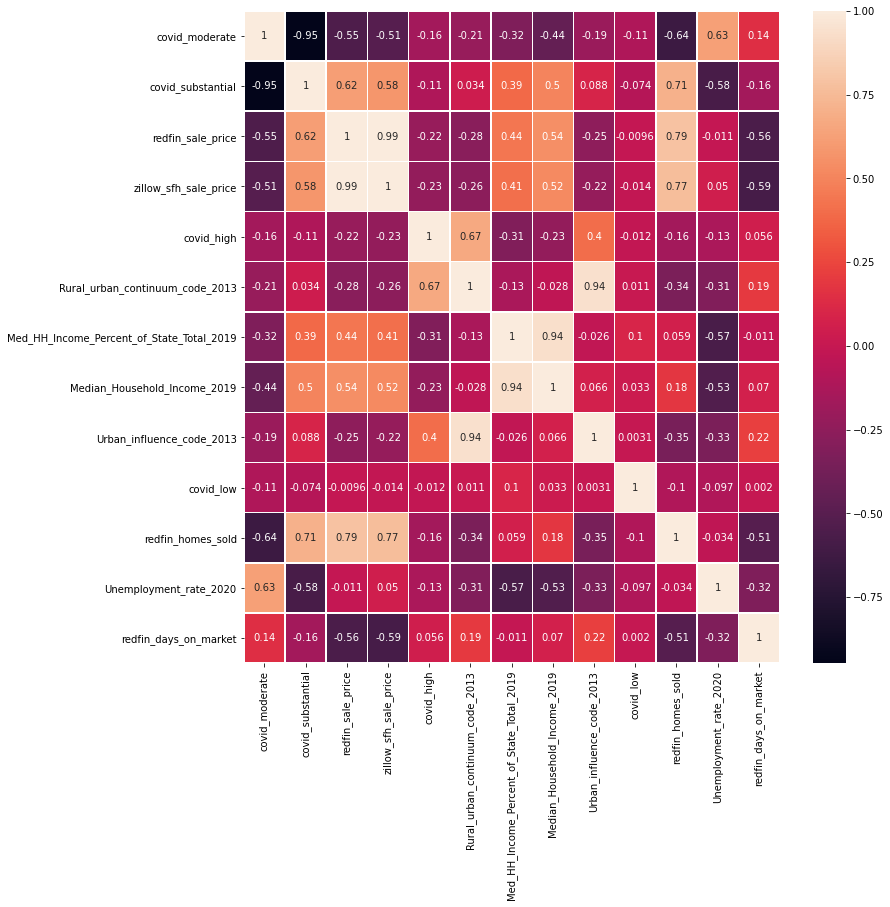

In [17]:
df_inf = X[['covid_moderate', 'covid_substantial', 'redfin_sale_price', 'zillow_sfh_sale_price', 
           'covid_high', 'Rural_urban_continuum_code_2013','Med_HH_Income_Percent_of_State_Total_2019', 'Median_Household_Income_2019',
           'Urban_influence_code_2013','covid_low','redfin_homes_sold', 'Unemployment_rate_2020','redfin_days_on_market'
           ]]

corrMatrix = df_inf.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

In [26]:
#rerun VIF check
df_vif_2=X.drop(columns=['covid_substantial', 'redfin_sale_price','redfin_homes_sold','Rural_urban_continuum_code_2013',
                         'Med_HH_Income_Percent_of_State_Total_2019','Median_Household_Income_2019'
                        ])

vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = df_vif_2.columns
vif_data_2["VIF"] = [variance_inflation_factor(df_vif_2.values, i) for i in range(len(df_vif_2.columns))]
  
print(vif_data_2.sort_values(by=['VIF'], ascending=False))

                      feature         VIF
42                 Metro_2013  361.828012
7          Average_Rating_Zip  326.039630
8           Average_Price_Zip  158.810545
48      zillow_sfh_sale_price   39.477561
43     Unemployment_rate_2020   35.412938
0                      rating   24.849433
40             business_ratio   23.003381
41  Urban_influence_code_2013   20.619168
49      redfin_days_on_market   14.149177
1                       price   11.331944
5       total_restaurants_zip   10.659118
46             covid_moderate   10.004270
6           Total_Reviews_Zip    6.128170
3                    delivery    3.497774
47                   SizeRank    2.829822
20                       bars    2.207529
2                      pickup    1.976848
9                     hotdogs    1.690511
24                 sportsbars    1.573641
10                      pizza    1.542150
44                 covid_high    1.526236
11               tradamerican    1.459297
33                  juicebars    1

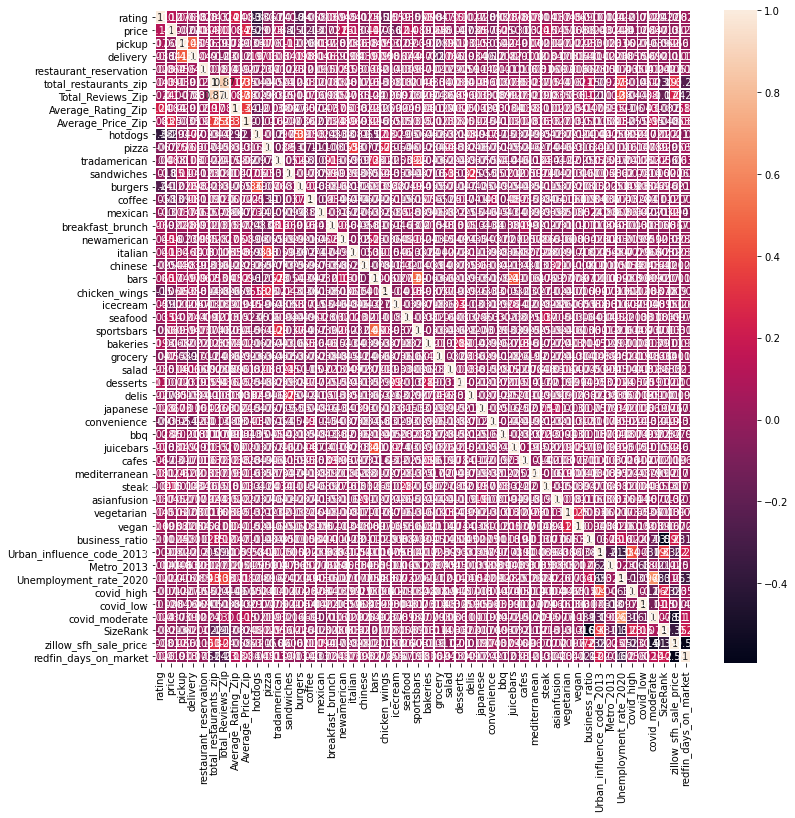

In [27]:
corrMatrix_3 = df_vif_2.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corrMatrix_3, annot=True, linewidths=.5, ax=ax)

In [25]:
#corrMatrix_3.to_csv("corr_matrix_full.csv")